<a href="https://colab.research.google.com/github/tester911007/Neural-network/blob/main/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_Data_Science_%D0%B8_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

from sklearn import tree

In [ ]:
href = 'https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv'

student_perfomance = pd.read_csv(href, encoding='UTF-8')

In [ ]:
# Группировка по математике и письму с выводом средненго и суммы
student_perfomance.groupby('gender').aggregate({'math score': ('mean', sum), 'writing score': ('mean', sum)})

math score        writing score       
             mean    sum          mean    sum
gender                                       
female  63.633205  32962     72.467181  37538
male    68.728216  33127     63.311203  30516

In [ ]:
# Вывод определённых строк и колонок
student_perfomance.iloc[[1, 2, 4], 0:]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?
student_perfomance.groupby('lunch').agg(['mean', 'var'])

math score             reading score             writing score  \
                   mean         var          mean         var          mean   
lunch                                                                         
free/reduced  58.921127  229.824270     64.653521  221.871139     63.022535   
standard      70.034109  186.418089     71.654264  191.285560     70.823256   

                          
                     var  
lunch                     
free/reduced  238.202881  
standard      205.620887

In [ ]:
# Переименовать столбцы
student_perfomance = student_perfomance \
    .rename(columns={'parental level of education': 'parental_level_of_education',
                     'test preparation course': 'test_preparation_course',
                     'math score': 'math_score',
                     'reading score': 'reading_score',
                     'writing score': 'writing_score'})

In [ ]:
# Вывод данных по условиям
passing_score = student_perfomance['writing_score'].mean()
student_perfomance.query("writing_score > @passing_score & gender == 'female'")[:5]

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


**Решающие деревья**

In [ ]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

X = data[['X_1', 'X_2']]
y = data.Y

clf.fit(X, y)

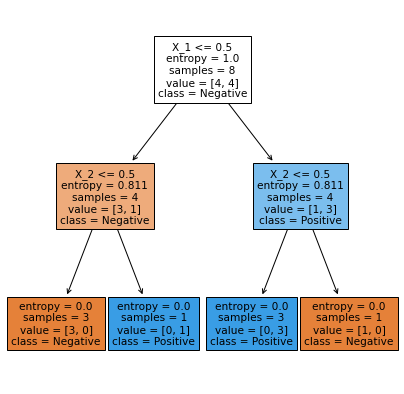

In [ ]:
plt.figure(figsize=(7, 7))

tree.plot_tree(clf, feature_names=list(X),
               class_names=['Negative', 'Positive'],
               filled=True);

**Титаник**

In [ ]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [ ]:
# Количество пустых значений
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Заполнить пустоту
titanic.fillna({'Age': titanic.Age.median()}, inplace=True)

# df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))

In [ ]:
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic.Survived

X = pd.get_dummies(X)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

Данные Титаника разделить на тренировочные и тестовые

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8238255033557047

In [ ]:
clf.score(X_test, y_test)

0.8203389830508474